In [1]:
import pandas as pd
import numpy as np


In [2]:
# Load low intensity short duration test data

test_list = ['low', 'medium', 'high']

# Dictionary to hold all the DataFrames, organized by test intensity
data_frames = {}

for test_intensity in test_list:
    base_path = './locust_test_result/{}-intensity-'.format(test_intensity)
    
    # Construct file paths dynamically
    paths = {
        'short': base_path + 'short_stats_history.csv',
        'short_low_spawn_rate': base_path + 'short-low-spawn-rate_stats_history.csv',
        'short_high_spawn_rate': base_path + 'short-high-spawn-rate_stats_history.csv',
        'long_5mins': base_path + 'long-5mins_stats_history.csv',
        'long_30mins': base_path + 'long-30mins_stats_history.csv',
        'long_60mins': base_path + 'long-60mins_stats_history.csv',
    }
    
    # Load dataframes and store them in the dictionary
    data_frames[test_intensity] = {key: pd.read_csv(path) for key, path in paths.items()}


low_short_df = data_frames['low']['short']

high_intensity_long_60mins_df = data_frames['high']['long_60mins']
# low_short_df.describe

low_short_df.columns

Index(['Timestamp', 'User Count', 'Type', 'Name', 'Requests/s', 'Failures/s',
       '50%', '66%', '75%', '80%', '90%', '95%', '98%', '99%', '99.9%',
       '99.99%', '100%', 'Total Request Count', 'Total Failure Count',
       'Total Median Response Time', 'Total Average Response Time',
       'Total Min Response Time', 'Total Max Response Time',
       'Total Average Content Size'],
      dtype='object')

-------------LowIntensity--------------------------


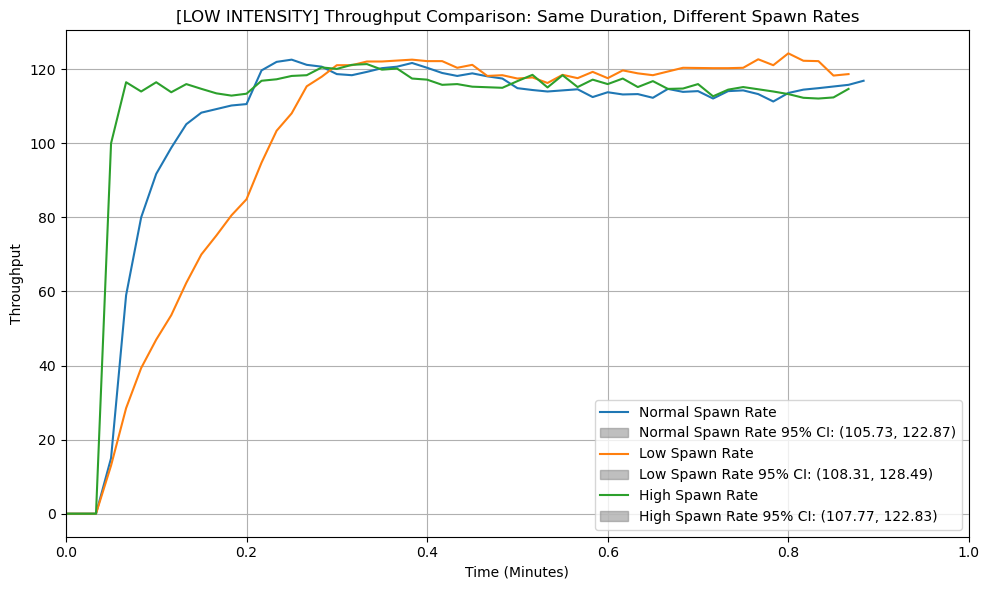

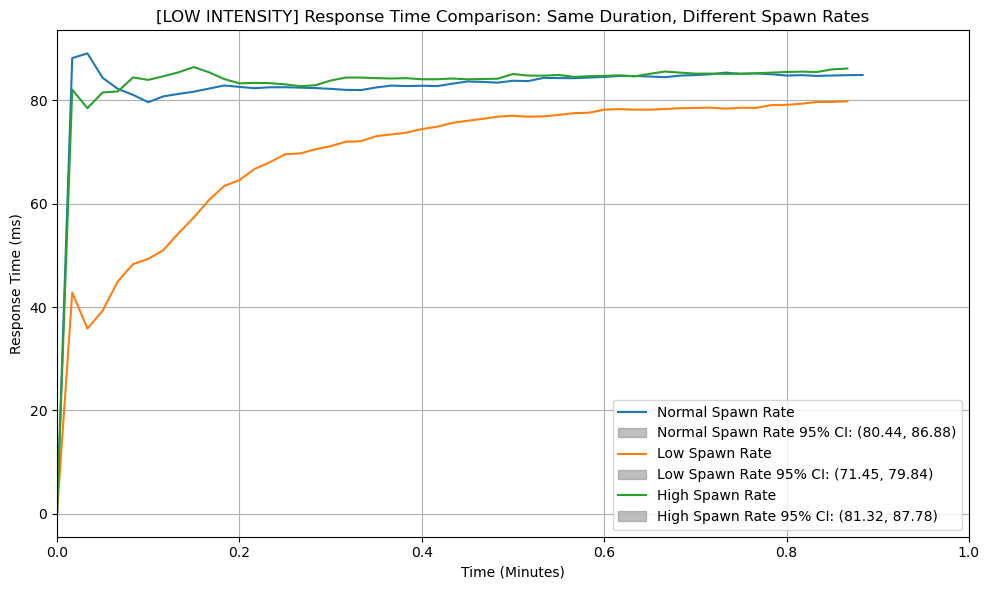

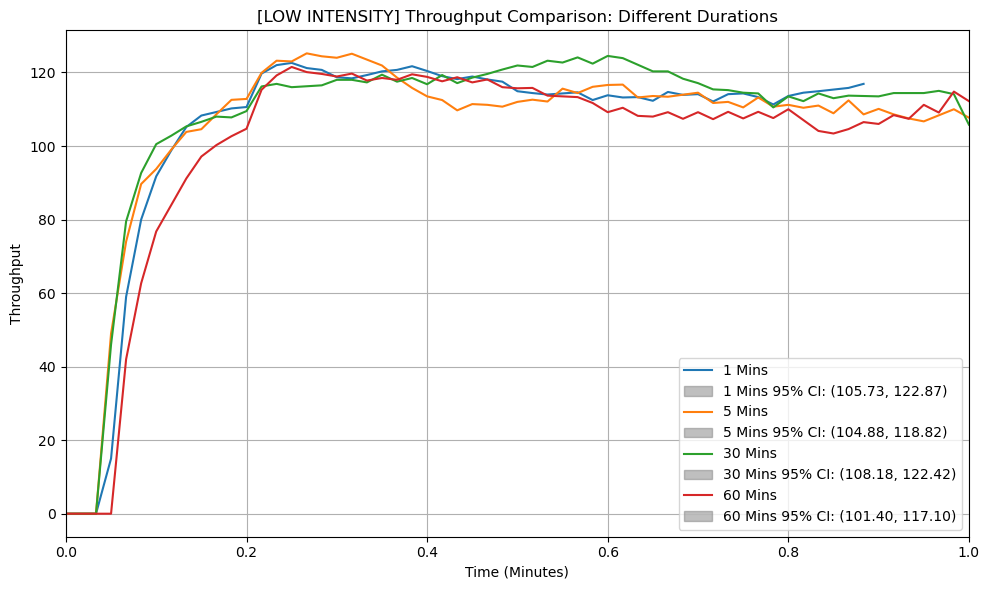

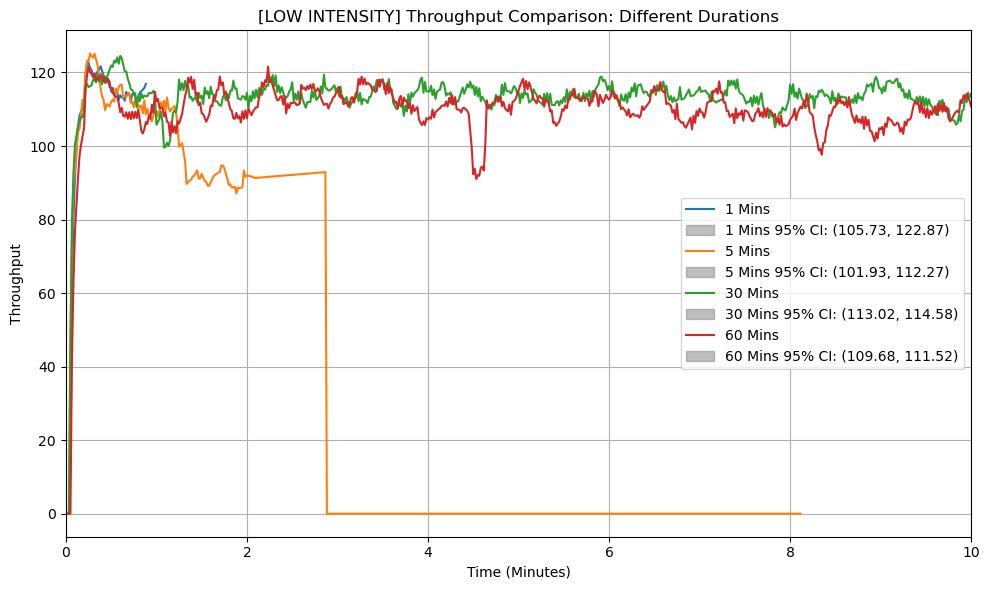

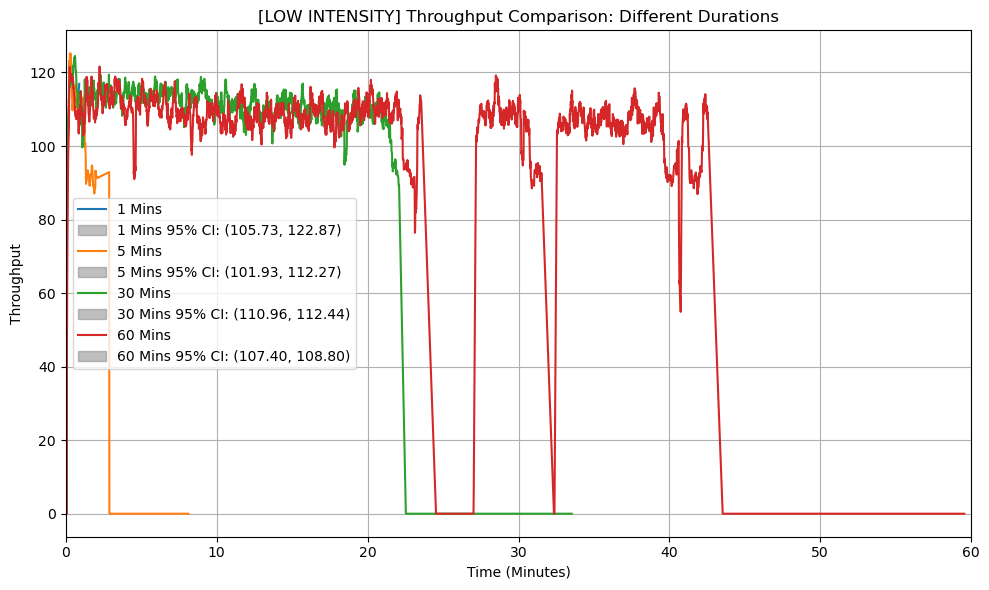

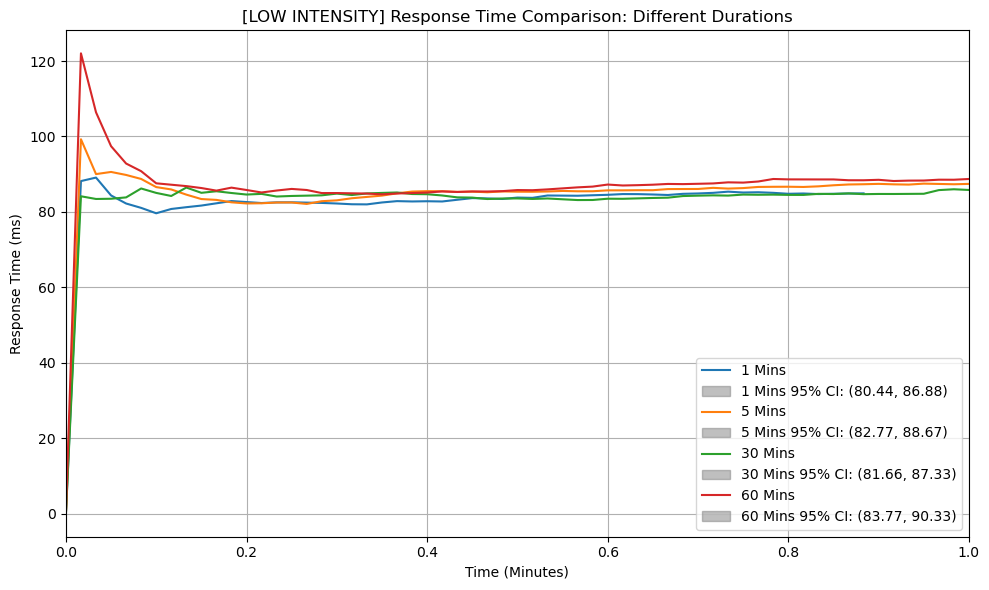

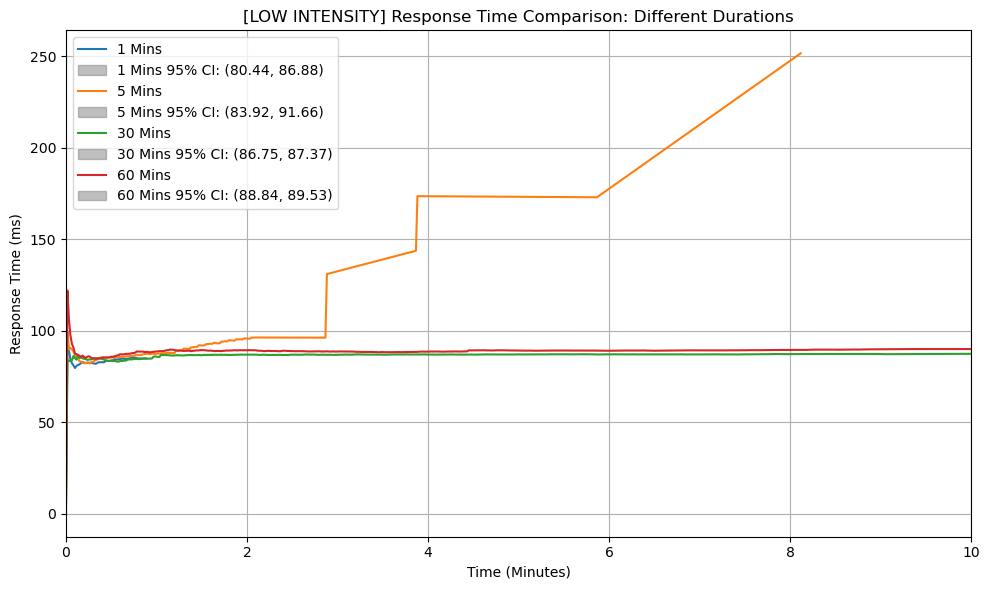

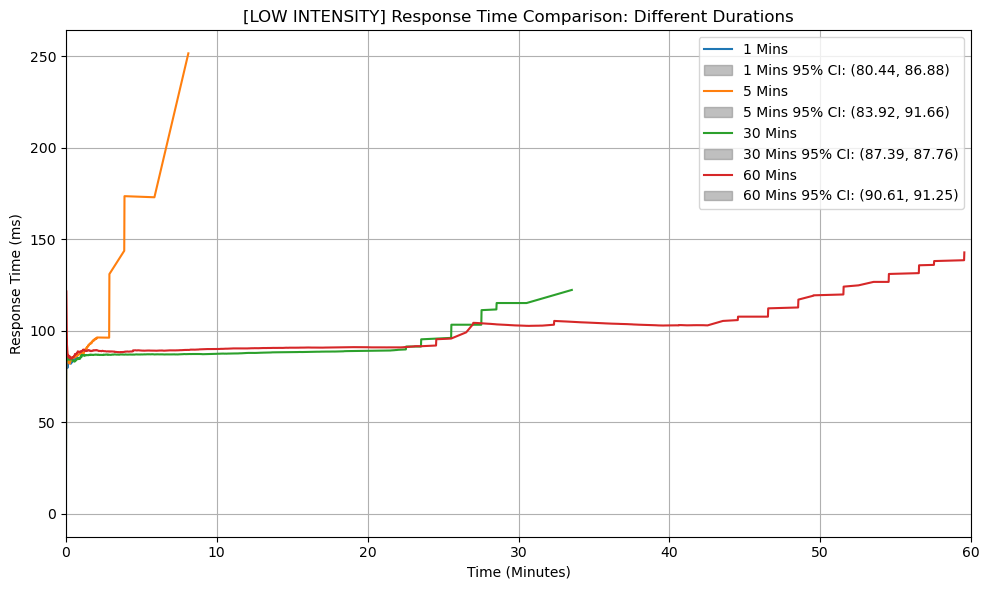

---------------------------------------------------


In [4]:
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def plot_data(dfs, labels, y_key, ylabel, title, max_duration=60):
    plt.figure(figsize=(10, 6))
    for df, label in zip(dfs, labels):
        # Normalize start time to 0 and convert Unix epoch timestamps to minutes
        start_time = df['Timestamp'].min()
        time_in_minutes = (df['Timestamp'] - start_time) / 60  # Convert seconds to minutes
        
        # Apply cutoff based on max_duration
        cutoff_index = time_in_minutes <= max_duration
        time_data = time_in_minutes[cutoff_index]
        y_data = df[y_key][cutoff_index]
        
        # Compute median and confidence interval
        median_val = np.median(y_data)
        std_dev = np.std(y_data)
        sample_size = len(y_data)
        z_score = stats.norm.ppf(0.975)  # for 95% confidence interval
        margin_error = z_score * (std_dev / np.sqrt(sample_size))
        conf_interval = (median_val - margin_error, median_val + margin_error)
        
        # Plot the data
        plt.plot(time_data, y_data, label=label)
        
        # Annotations for median and confidence interval
        # plt.axhline(y=median_val, color='r', linestyle='-', label=f'{label} Median: {median_val:.2f}')
        plt.fill_betweenx([0, max(y_data)], x1=conf_interval[0], x2=conf_interval[1], color='gray', alpha=0.5, label=f'{label} 95% CI: ({conf_interval[0]:.2f}, {conf_interval[1]:.2f})')
    
    plt.xlabel('Time (Minutes)')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc='best')
    plt.grid(True)
    plt.xlim(0, max_duration)  # Set x-axis limits to match the cutoff duration
    plt.tight_layout()
    plt.savefig(f'{title.replace(" ", "_").lower()}.png')
    plt.show()


print("-------------LowIntensity--------------------------")

# Same duration, different spawn rates
plot_data(
    [data_frames['low']['short'], data_frames['low']['short_low_spawn_rate'], data_frames['low']['short_high_spawn_rate']],
    ['Normal Spawn Rate', 'Low Spawn Rate', 'High Spawn Rate'],
    'Requests/s',
    'Throughput',
    '[LOW INTENSITY] Throughput Comparison: Same Duration, Different Spawn Rates',
    max_duration= 1
)

plot_data(
    [data_frames['low']['short'], data_frames['low']['short_low_spawn_rate'], data_frames['low']['short_high_spawn_rate']],    
    ['Normal Spawn Rate', 'Low Spawn Rate', 'High Spawn Rate'],
    'Total Average Response Time',
    'Response Time (ms)',
    '[LOW INTENSITY] Response Time Comparison: Same Duration, Different Spawn Rates',
    max_duration= 1
)

# Different durations
plot_data(
    [data_frames['low']['short'], data_frames['low']['long_5mins'], data_frames['low']['long_30mins'],  data_frames['low']['long_60mins']],    
    ['1 Mins', '5 Mins', '30 Mins', '60 Mins'],
    'Requests/s',
    'Throughput',
    '[LOW INTENSITY] Throughput Comparison: Different Durations',
    max_duration= 1
)

plot_data(
    [data_frames['low']['short'], data_frames['low']['long_5mins'], data_frames['low']['long_30mins'],  data_frames['low']['long_60mins']],    
    ['1 Mins', '5 Mins', '30 Mins', '60 Mins'],
    'Requests/s',
    'Throughput',
    '[LOW INTENSITY] Throughput Comparison: Different Durations',
    max_duration= 10
)

plot_data(
    [data_frames['low']['short'], data_frames['low']['long_5mins'], data_frames['low']['long_30mins'],  data_frames['low']['long_60mins']],    
    ['1 Mins', '5 Mins', '30 Mins', '60 Mins'],
    'Requests/s',
    'Throughput',
    '[LOW INTENSITY] Throughput Comparison: Different Durations'
)

plot_data(
    [data_frames['low']['short'], data_frames['low']['long_5mins'], data_frames['low']['long_30mins'],  data_frames['low']['long_60mins']],    
    ['1 Mins', '5 Mins', '30 Mins', '60 Mins'],
    'Total Average Response Time',
    'Response Time (ms)',
    '[LOW INTENSITY] Response Time Comparison: Different Durations',
    max_duration= 1
)

plot_data(
    [data_frames['low']['short'], data_frames['low']['long_5mins'], data_frames['low']['long_30mins'],  data_frames['low']['long_60mins']],    
    ['1 Mins', '5 Mins', '30 Mins', '60 Mins'],
    'Total Average Response Time',
    'Response Time (ms)',
    '[LOW INTENSITY] Response Time Comparison: Different Durations',
    max_duration= 10
)

plot_data(
    [data_frames['low']['short'], data_frames['low']['long_5mins'], data_frames['low']['long_30mins'],  data_frames['low']['long_60mins']],    
    ['1 Mins', '5 Mins', '30 Mins', '60 Mins'],
    'Total Average Response Time',
    'Response Time (ms)',
    '[LOW INTENSITY] Response Time Comparison: Different Durations'
)

print("---------------------------------------------------")


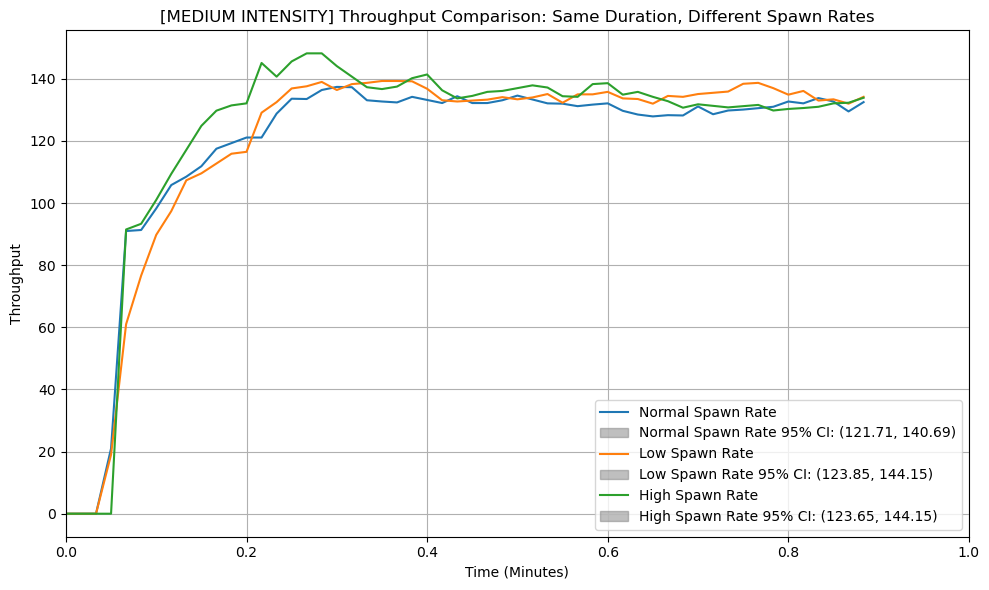

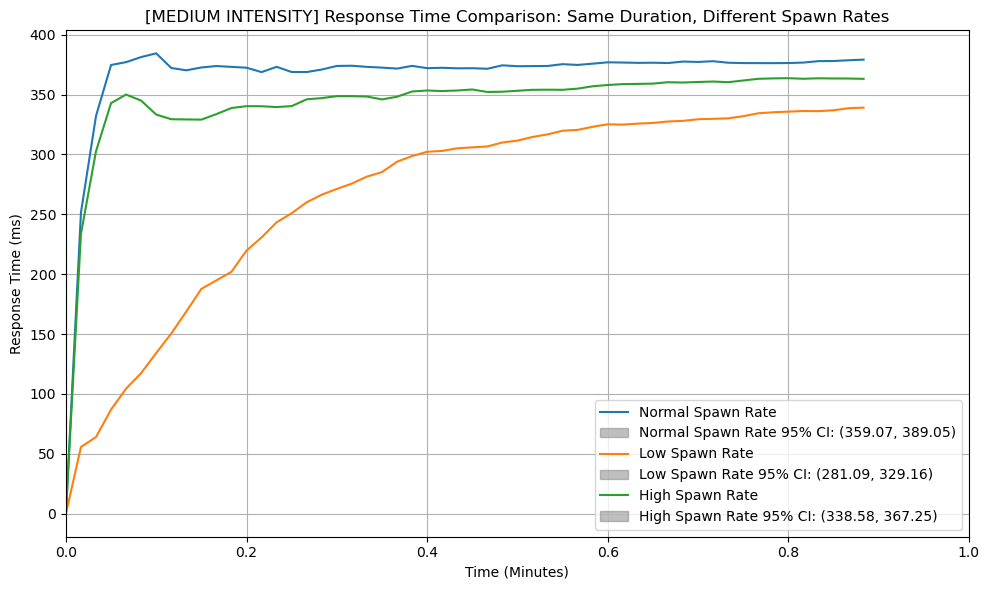

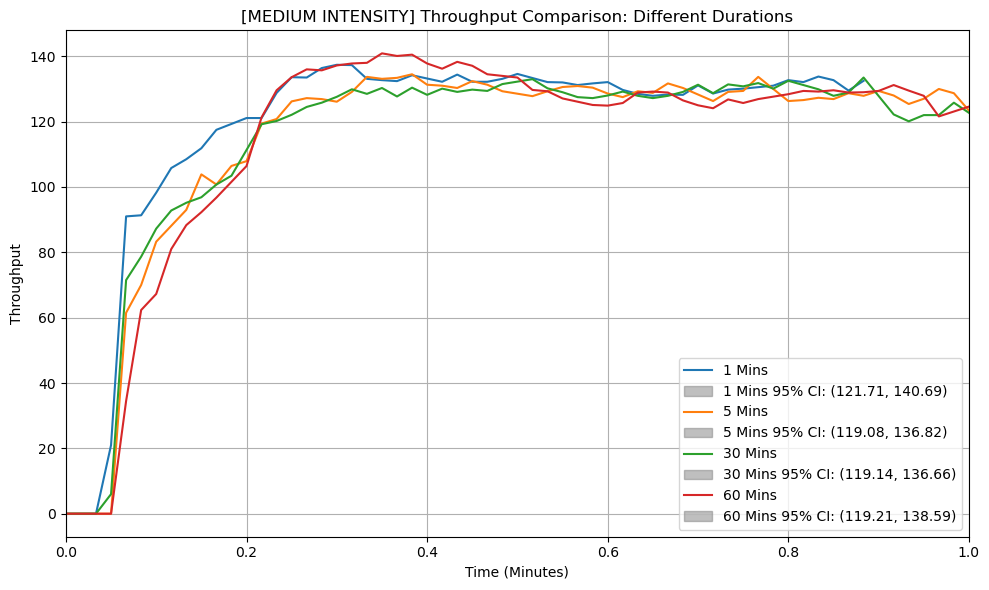

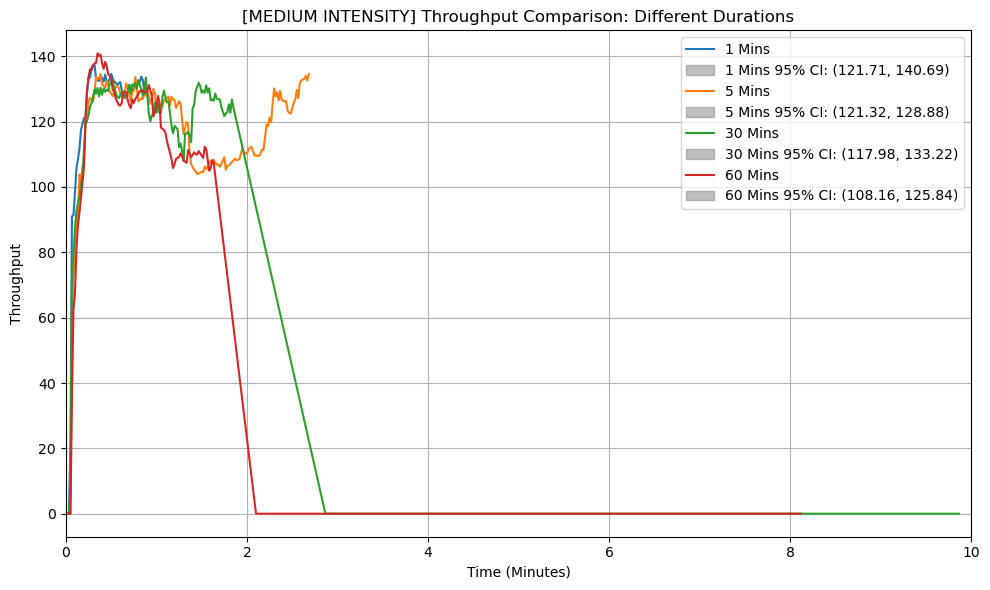

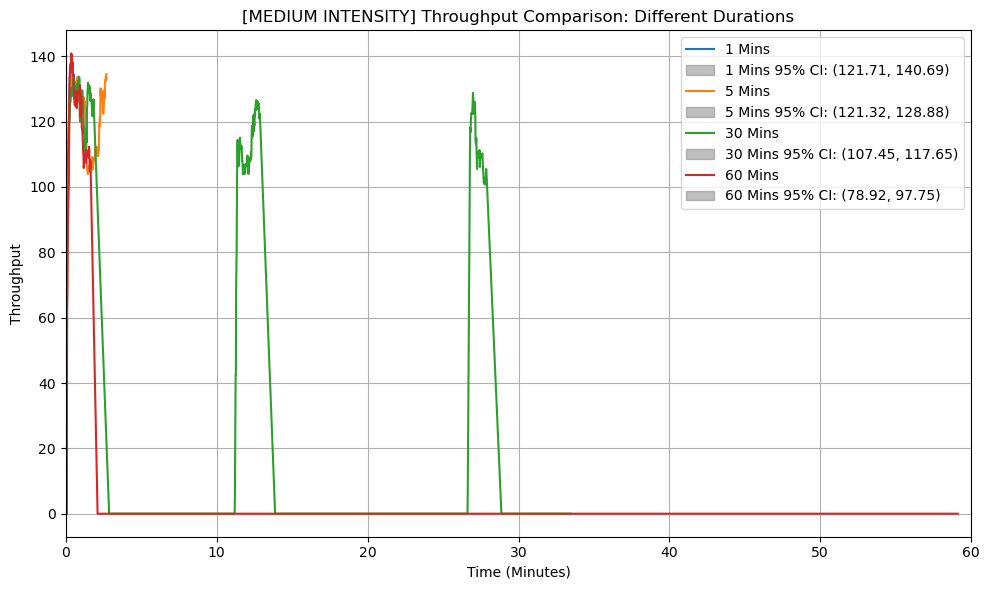

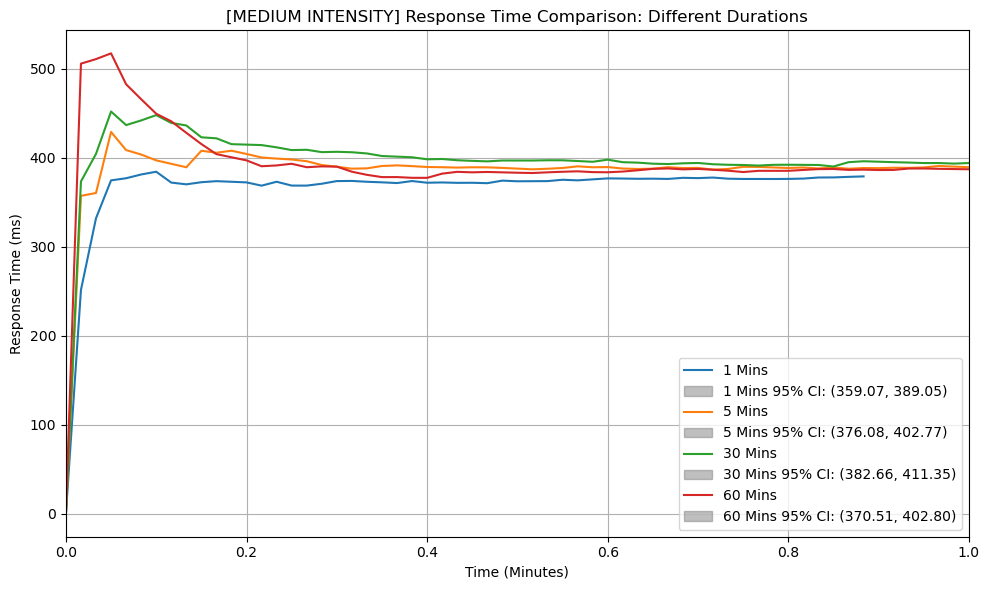

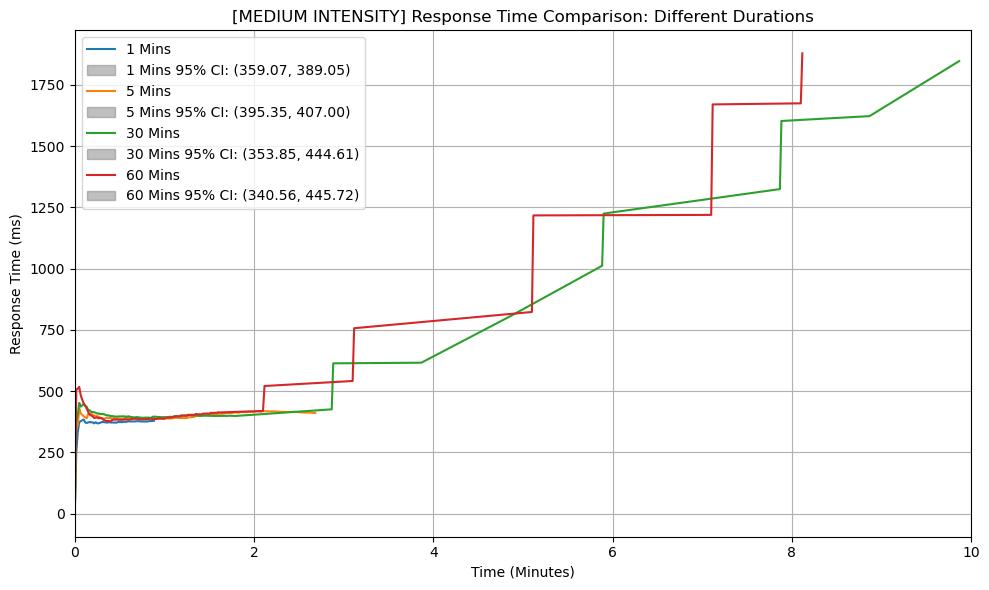

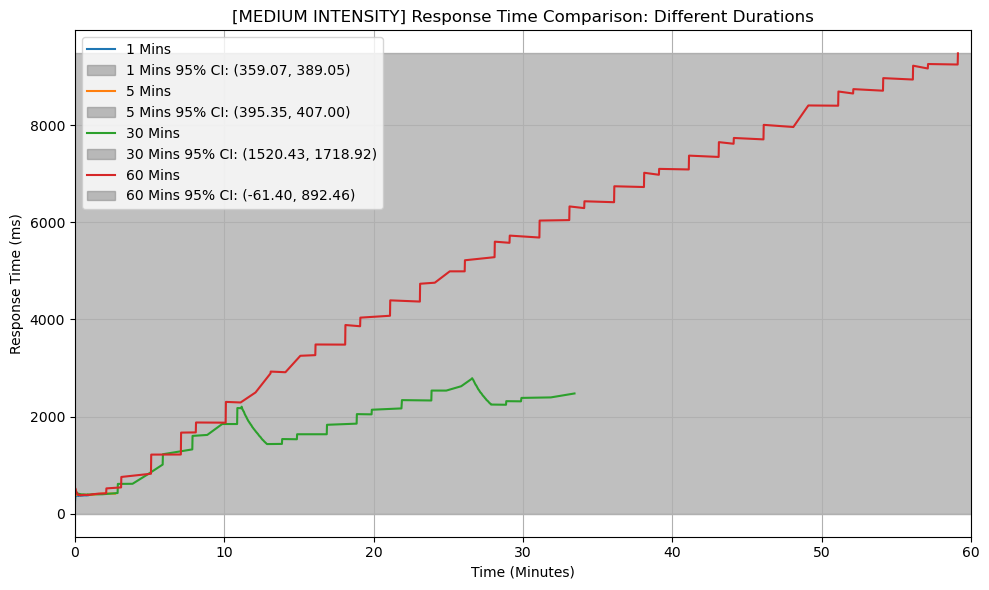

In [5]:
plot_data(
    [data_frames['medium']['short'], data_frames['medium']['short_low_spawn_rate'], data_frames['medium']['short_high_spawn_rate']],
    ['Normal Spawn Rate', 'Low Spawn Rate', 'High Spawn Rate'],
    'Requests/s',
    'Throughput',
    '[MEDIUM INTENSITY] Throughput Comparison: Same Duration, Different Spawn Rates',
    max_duration= 1
)

plot_data(
    [data_frames['medium']['short'], data_frames['medium']['short_low_spawn_rate'], data_frames['medium']['short_high_spawn_rate']],    
    ['Normal Spawn Rate', 'Low Spawn Rate', 'High Spawn Rate'],
    'Total Average Response Time',
    'Response Time (ms)',
    '[MEDIUM INTENSITY] Response Time Comparison: Same Duration, Different Spawn Rates',
    max_duration= 1
)

# Different durations
plot_data(
    [data_frames['medium']['short'], data_frames['medium']['long_5mins'], data_frames['medium']['long_30mins'],  data_frames['medium']['long_60mins']],    
    ['1 Mins', '5 Mins', '30 Mins', '60 Mins'],
    'Requests/s',
    'Throughput',
    '[MEDIUM INTENSITY] Throughput Comparison: Different Durations',
    max_duration= 1
)

plot_data(
    [data_frames['medium']['short'], data_frames['medium']['long_5mins'], data_frames['medium']['long_30mins'],  data_frames['medium']['long_60mins']],    
    ['1 Mins', '5 Mins', '30 Mins', '60 Mins'],
    'Requests/s',
    'Throughput',
    '[MEDIUM INTENSITY] Throughput Comparison: Different Durations',
    max_duration= 10
)

plot_data(
    [data_frames['medium']['short'], data_frames['medium']['long_5mins'], data_frames['medium']['long_30mins'],  data_frames['medium']['long_60mins']],    
    ['1 Mins', '5 Mins', '30 Mins', '60 Mins'],
    'Requests/s',
    'Throughput',
    '[MEDIUM INTENSITY] Throughput Comparison: Different Durations'
)

plot_data(
    [data_frames['medium']['short'], data_frames['medium']['long_5mins'], data_frames['medium']['long_30mins'],  data_frames['medium']['long_60mins']],    
    ['1 Mins', '5 Mins', '30 Mins', '60 Mins'],
    'Total Average Response Time',
    'Response Time (ms)',
    '[MEDIUM INTENSITY] Response Time Comparison: Different Durations',
    max_duration= 1
)

plot_data(
    [data_frames['medium']['short'], data_frames['medium']['long_5mins'], data_frames['medium']['long_30mins'],  data_frames['medium']['long_60mins']],    
    ['1 Mins', '5 Mins', '30 Mins', '60 Mins'],
    'Total Average Response Time',
    'Response Time (ms)',
    '[MEDIUM INTENSITY] Response Time Comparison: Different Durations',
    max_duration= 10
)

plot_data(
    [data_frames['medium']['short'], data_frames['medium']['long_5mins'], data_frames['medium']['long_30mins'],  data_frames['medium']['long_60mins']],    
    ['1 Mins', '5 Mins', '30 Mins', '60 Mins'],
    'Total Average Response Time',
    'Response Time (ms)',
    '[MEDIUM INTENSITY] Response Time Comparison: Different Durations'
)

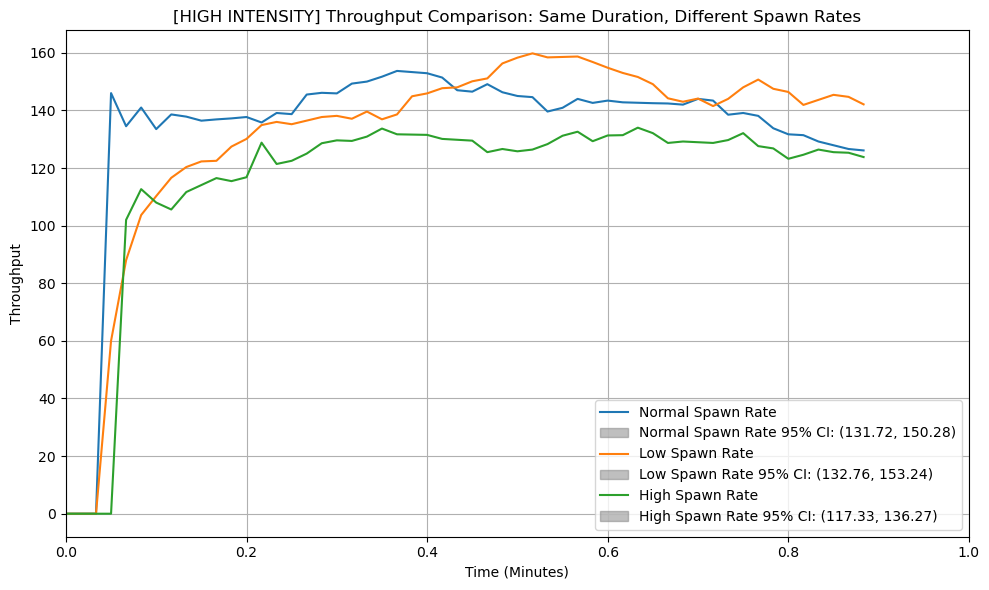

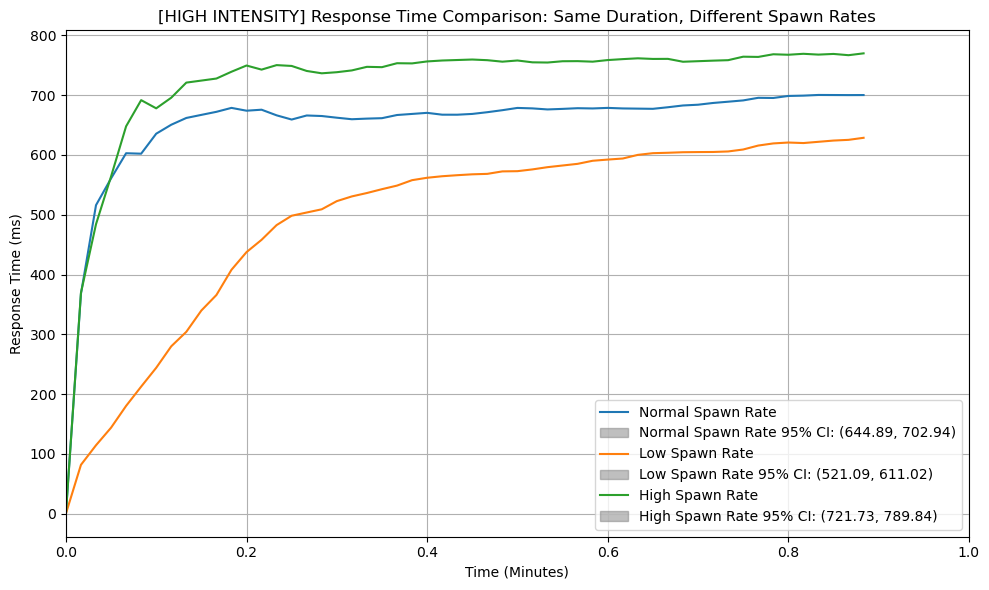

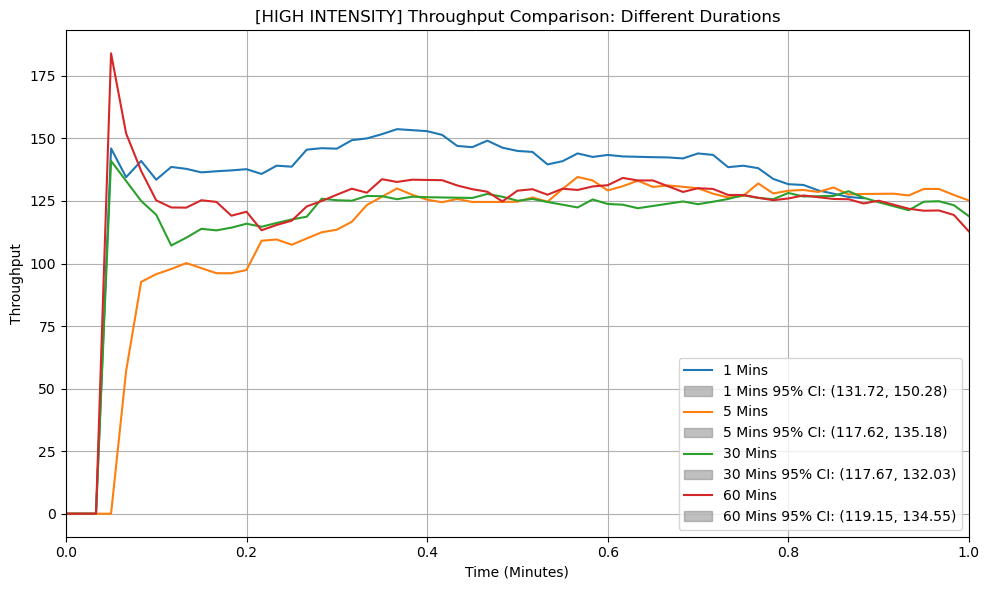

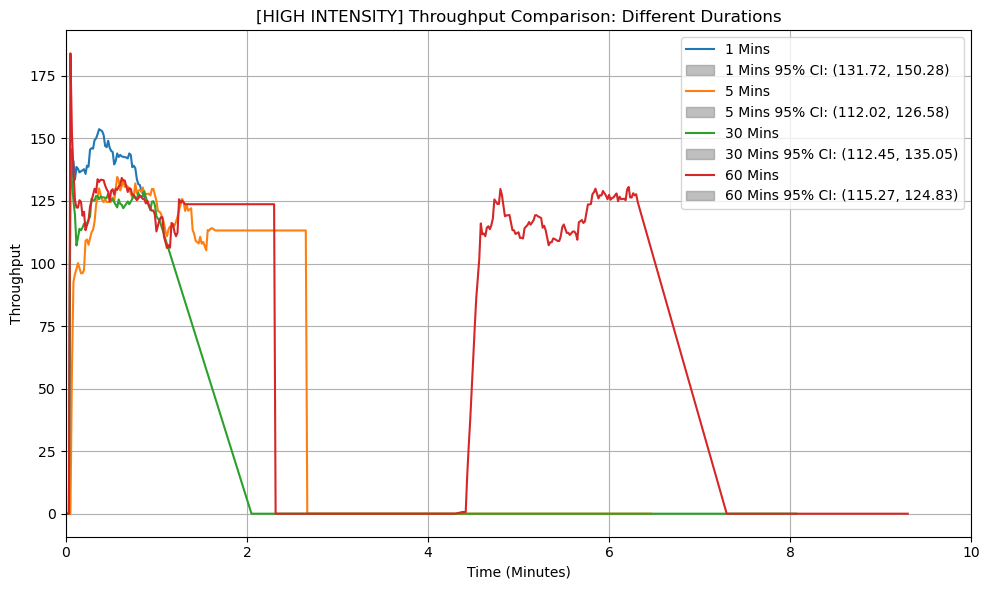

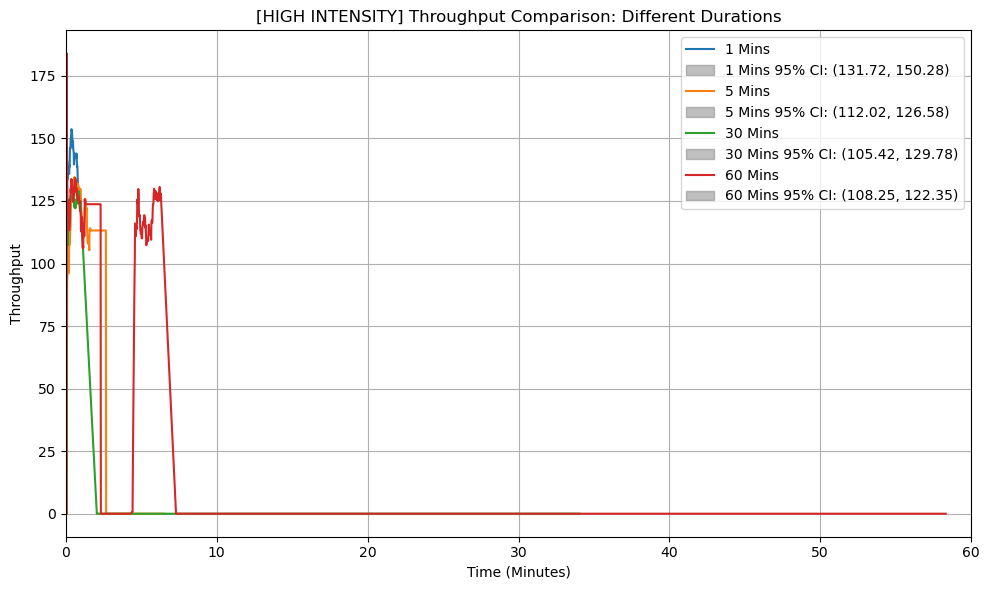

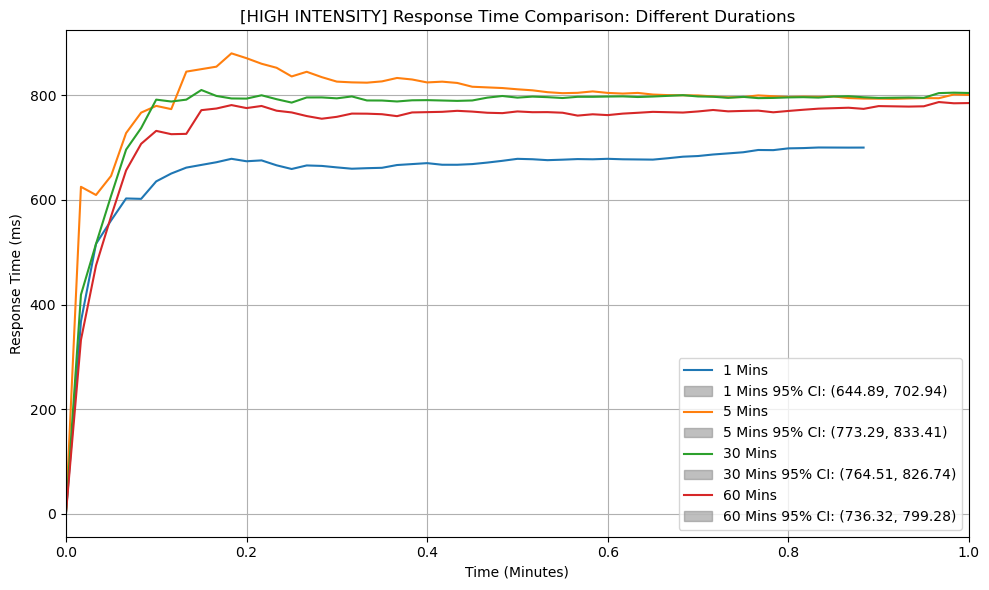

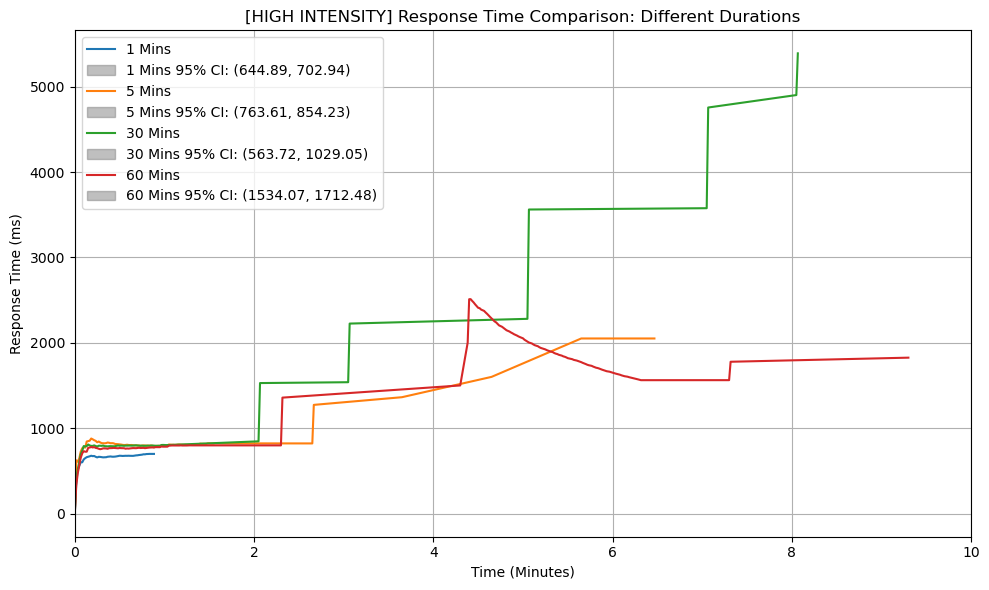

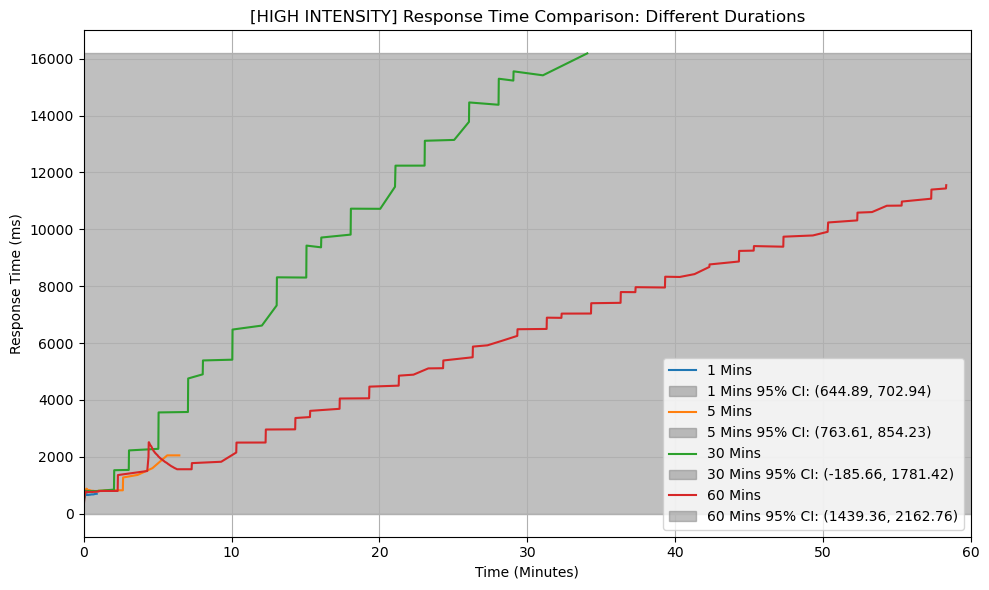

In [6]:
plot_data(
    [data_frames['high']['short'], data_frames['high']['short_low_spawn_rate'], data_frames['high']['short_high_spawn_rate']],
    ['Normal Spawn Rate', 'Low Spawn Rate', 'High Spawn Rate'],
    'Requests/s',
    'Throughput',
    '[HIGH INTENSITY] Throughput Comparison: Same Duration, Different Spawn Rates',
    max_duration= 1
)

plot_data(
    [data_frames['high']['short'], data_frames['high']['short_low_spawn_rate'], data_frames['high']['short_high_spawn_rate']],    
    ['Normal Spawn Rate', 'Low Spawn Rate', 'High Spawn Rate'],
    'Total Average Response Time',
    'Response Time (ms)',
    '[HIGH INTENSITY] Response Time Comparison: Same Duration, Different Spawn Rates',
    max_duration= 1
)

# Different durations

plot_data(
    [data_frames['high']['short'], data_frames['high']['long_5mins'], data_frames['high']['long_30mins'],  data_frames['high']['long_60mins']],    
    ['1 Mins', '5 Mins', '30 Mins', '60 Mins'],
    'Requests/s',
    'Throughput',
    '[HIGH INTENSITY] Throughput Comparison: Different Durations',
    max_duration= 1
)

plot_data(
    [data_frames['high']['short'], data_frames['high']['long_5mins'], data_frames['high']['long_30mins'],  data_frames['high']['long_60mins']],    
    ['1 Mins', '5 Mins', '30 Mins', '60 Mins'],
    'Requests/s',
    'Throughput',
    '[HIGH INTENSITY] Throughput Comparison: Different Durations',
    max_duration= 10
)

plot_data(
    [data_frames['high']['short'], data_frames['high']['long_5mins'], data_frames['high']['long_30mins'],  data_frames['high']['long_60mins']],    
    ['1 Mins', '5 Mins', '30 Mins', '60 Mins'],
    'Requests/s',
    'Throughput',
    '[HIGH INTENSITY] Throughput Comparison: Different Durations'
)

plot_data(
    [data_frames['high']['short'], data_frames['high']['long_5mins'], data_frames['high']['long_30mins'],  data_frames['high']['long_60mins']],    
    ['1 Mins', '5 Mins', '30 Mins', '60 Mins'],
    'Total Average Response Time',
    'Response Time (ms)',
    '[HIGH INTENSITY] Response Time Comparison: Different Durations',
    max_duration= 1
)

plot_data(
    [data_frames['high']['short'], data_frames['high']['long_5mins'], data_frames['high']['long_30mins'],  data_frames['high']['long_60mins']],    
    ['1 Mins', '5 Mins', '30 Mins', '60 Mins'],
    'Total Average Response Time',
    'Response Time (ms)',
    '[HIGH INTENSITY] Response Time Comparison: Different Durations',
    max_duration= 10
)

plot_data(
    [data_frames['high']['short'], data_frames['high']['long_5mins'], data_frames['high']['long_30mins'],  data_frames['high']['long_60mins']],    
    ['1 Mins', '5 Mins', '30 Mins', '60 Mins'],
    'Total Average Response Time',
    'Response Time (ms)',
    '[HIGH INTENSITY] Response Time Comparison: Different Durations'
)